In [1]:
# Description: PyTorch Introduction Tutorial

In [2]:
# Simple Linear Regression Model
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate Data and Split the data into test data and validation data
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2*x + np.random.rand(100,1)

# Shuffle the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Use the first 80 data points as test data
idx_train = idx[:80]
# Use the remaining 20 data points as validation data
idx_val = idx[80:]

# Split the data
# Train
x_train, y_train = x[idx_train], y[idx_train]
# Validation
x_test, y_test = x[idx_val], y[idx_val]


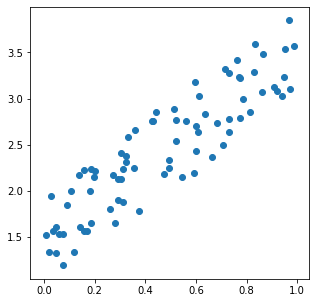

In [4]:
# Let's plot the data
plt.figure(figsize = (5, 5))
plt.scatter(x_train, y_train, label = "Test Data: Linear Regression")

In [5]:
# We are going to train our model and use MSE as the loss function

# Intialize the parameters and the hyperparamters
np.random.seed(42)
a = np.random.rand(1)
b = np.random.rand(1)

# Learning rate
lr = 1e-1
# Number of Epochs
n_epochs = 1000

# We are going to loop for the number of epochs

for epoch in range(n_epochs):
    # Predicions
    y_hat = a + b * x_train
    
    
    # Compute the Error
    error  = (y_train - y_hat)
    # Computer the MSE
    MSE = (error**2).mean()
    
    # Compute the Gradient Descent
    
    part_a = -2* error.mean() 
    part_b = -2* (x_train * error).mean()
    
    # Update the Parameters
    
    a = a - lr*part_a
    b = b - lr*part_b
    
print(a,b)

# Sanity Check of our code above
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
print(lin_model.intercept_, lin_model.coef_[0])

[1.53033554] [1.95814388]
[1.5303354] [1.95814415]


In [6]:
# PyTorch Time
import torch
import torch.optim as optim
import torch.nn as nn

# See if cuda is available

device = "cuda" if torch.cuda.is_available() else "cpu"

# Now we need to transform Numpy Array into tensors and send them to a chose device

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

C:\Users\Pavlo Lakomov\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [7]:
# We are going to repeat the same steps using the torch tensors

# We need to intialize the parameters
# We need to set the attiribute  "requires_grad" to True, since we want
# gradient descent applied to these paramaters

a = torch.randn(1, requires_grad = True,  dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)

print(a,b)



tensor([0.6910], requires_grad=True) tensor([0.5313], requires_grad=True)


In [8]:
# We are going to implement the Linear Regression using Pytorch

# First we intialize the parameters
a = torch.randn(1, requires_grad = True,  dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)

# We need to then initalize hyperparameters

lr = 1e-1
n_epochs = 1000

for epoch in range(n_epochs):
    # Predictions
    y_hat = a + b * x_train_tensor
    
    # Compute the error
    error = y_train_tensor - y_hat
    loss = (error**2).mean()
    
    # Compute the gradients using the backward() method
    loss.backward()
    
    #print(a.grad)
    #print(b.grad)
    
    # we need to use no_grad  to keep the update out of the gradient computation
    
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    # This is to restart the gradient as I understand (to able to compute the
    # new gradient based on the new values)
    a.grad.zero_()
    b.grad.zero_()
print(a, b)

tensor([1.5303], requires_grad=True) tensor([1.9581], requires_grad=True)


In [9]:
# We are going to visuzalize the dynamic computational graph
# using torchviz and its method make_dot()

torch.manual_seed(42)

a = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)

yhat = a + b * x_train_tensor
error = (y_train_tensor - yhat)
loss = (error ** 2).mean()

# Vizualizing the dynamic computational graph 
# We have a problem; for some reason the torchviz in not working

In [ ]:
# Note: Computational graphs are created here 

In [12]:
# We are going to use an optimizer to update the gradients automatically
# instead of use doing it manually

torch.manual_seed(42)
a = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
print(a,b)

lr = 1e-1
n_epochs = 1000

# Defines a SGD optimizer to update the parameters

optimizer = optim.SGD([a,b], lr = lr )

for epoch in range(n_epochs):
    # Prediction
    yhat = a + b * x_train_tensor
    
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    loss.backward() # we compute the gradients of a and b using this method
    
    optimizer.step() # Its manually going to update our parameters
    optimizer.zero_grad() # Zeroes the gradients (required for the dynamic computational graphs)
    

print(a,b)
    

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.5303], requires_grad=True) tensor([1.9581], requires_grad=True)


In [13]:
# We repeat the same process but now we use the nn.MSELoss function to optimize
# our code even further


torch.manual_seed(42)

a = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)

lr = 1e-1
n_epochs = 1000

# Define the Loss MSE function
loss_fn = nn.MSELoss(reduction = "mean")

# Define the Optimizer
optimizer = optim.SGD([a,b], lr = lr)

for epoch in range(n_epochs):
    
    yhat = a +  b * x_train_tensor
    
    loss = loss_fn(y_train_tensor, yhat)
    
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
print(a,b)

tensor([1.5303], requires_grad=True) tensor([1.9581], requires_grad=True)


In [14]:
# We are going to repeat the same regression problem but using
# the Pytorch's Module Class

class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__() # super() inherits the attributes and the methods
                            # of the super class (i.e. the Module class)
        # To make "a" and "b" real parametersof the model, we need
        # to wrap them with nn.Parameter
        
        self.a = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float, device= device))
        self.b = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float, device = device))
        # We wrap the a and b in Parameter, so that our model knows that these
        # variables are parameters and so that we can later on call the method
        # Module.parameters() to extract all the parameters
    def forward(self, x):
        # Computes the outputs/predictions
        return self.a + self.b *x

In [17]:
# Now, we are going to implement the problem using the class above

torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)
# We can also inspect the current parameters of the model
model.state_dict()

lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction = "mean")

optimizer = optim.SGD(model.parameters(), lr = lr)

for epoch in range(n_epochs):
    
    model.train() # I'm not quite sure what this is for
    yhat = model(x_train_tensor)
    loss = loss_fn(y_train_tensor, yhat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(model.state_dict())

OrderedDict([('a', tensor([1.5303])), ('b', tensor([1.9581]))])


In [22]:
# Nested Models; Show how a model class can have models as attributes (nested)

# Redisign the LinearModel Class

class LayerLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a linear layer with single
        # input and single output
        self.linear = nn.Linear(1,1)
    
    def forward(self, x):
        # Now it only takes a call tot he layer to make predictions
        return self.linear(x)


    

In [23]:
## Here is how our Linear Regression Model would look like if we wanted 
# to use the Sequential Model module
model = nn.Sequential(nn.Linear(1,1).to(device))

In [31]:
# Train Step

def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to train mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Compute the Loss
        loss = loss_fn(y, yhat)
        #Computes the gradients
        loss.backward()
        # Updates the parameters and zeroes the gradiaents
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return train_step

train_step = make_train_step(model, loss_fn, optimizer)
losses = []

for epoch in range(n_epochs):
    loss = train_step(x_train_tensor, y_train_tensor)
    losses.append(loss)

# Check model's parameters
print(model.state_dict())


OrderedDict([('weight', tensor([[1.9581]])), ('bias', tensor([1.5303]))])


In [36]:
# Build a custom dataset class
from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
    def __getitem__(self, index):
        return (self.x[index], self.y[index])
    def __len__(self):
        return len(self.x)

x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

tensor_data = CustomDataset(x_train_tensor, y_train_tensor)
print(tensor_data[0])

train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0.5227]), tensor([2.7714]))
(tensor([0.5227]), tensor([2.7714]))


In [37]:
# DataLoader

from torch.utils.data import DataLoader

train_loader = DataLoader(dataset = train_data, batch_size = 16, shuffle = True)

# To retrieve a sample mini-batch, simply run the command
next(iter(train_loader))

[tensor([[0.9219],
         [0.5467],
         [0.0740],
         [0.3252],
         [0.5979],
         [0.3745],
         [0.4952],
         [0.1834],
         [0.1560],
         [0.5227],
         [0.4722],
         [0.1409],
         [0.9395],
         [0.0746],
         [0.6376],
         [0.3046]]), tensor([[3.0858],
         [2.1449],
         [1.5348],
         [2.3104],
         [3.1815],
         [1.7805],
         [2.2421],
         [2.2383],
         [1.5613],
         [2.7714],
         [2.1863],
         [1.6026],
         [3.0239],
         [1.1899],
         [2.8303],
         [2.1280]])]

In [38]:
# Now we are going to use our dataset and data loader to modify our code above

losse = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
         # the dataset "lives" in the CPU, so we need to send it to the device
        # where the model "lives"
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        loss = train_step(x_batch, y_batch)
        
        losses.append(loss)
        
        
print(model.state_dict())

OrderedDict([('weight', tensor([[1.9560]])), ('bias', tensor([1.5246]))])


In [39]:
# We are going to use the training PyTorch's Random_Split method to split the
# data into training and validation set

from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [80,20])

train_loader = DataLoader(dataset = train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(dataset = val_dataset, batch_size = 16)

In [41]:
# Now we are going to include the evaluation process 

losses = []
val_losses =[]
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    
    for x_batch, y_batch in train_loader:
        
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        losses.append(train_step(x_batch, y_batch))
        
    with torch.no_grad():
        for x_val, y_val in val_loader:
            
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            
            model.eval() # Set the model to evaluation mode
            
            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            
            val_losses.append(val_loss.item())
            
print(model.state_dict())    
print(val_losses)

OrderedDict([('weight', tensor([[1.9979]])), ('bias', tensor([1.4945]))])


[0.09720437228679657, 0.0817413404583931, 0.09578168392181396, 0.08380592614412308, 0.09638525545597076, 0.08277467638254166, 0.09752064198255539, 0.08137867599725723, 0.1002296730875969, 0.07942860573530197, 0.09689612686634064, 0.08209078013896942, 0.09540413320064545, 0.08446203917264938, 0.09577560424804688, 0.0837317630648613, 0.0949385017156601, 0.0855427011847496, 0.09552493691444397, 0.08414643257856369, 0.09697741270065308, 0.08192579448223114, 0.09569606184959412, 0.08380906283855438, 0.09551605582237244, 0.08418770134449005, 0.09475111961364746, 0.08610300719738007, 0.09466777741909027, 0.08628270030021667, 0.09629089385271072, 0.08285421133041382, 0.09615474939346313, 0.083064503967762, 0.09716706722974777, 0.08173417299985886, 0.09705208241939545, 0.08186476677656174, 0.09635405242443085, 0.08276955038309097, 0.09536400437355042, 0.08450216054916382, 0.09724177420139313, 0.08163172751665115, 0.09591275453567505, 0.08345828950405121, 0.09736952930688858, 0.08149900287389755

In [42]:
print(val_losses)

[0.09720437228679657, 0.0817413404583931, 0.09578168392181396, 0.08380592614412308, 0.09638525545597076, 0.08277467638254166, 0.09752064198255539, 0.08137867599725723, 0.1002296730875969, 0.07942860573530197, 0.09689612686634064, 0.08209078013896942, 0.09540413320064545, 0.08446203917264938, 0.09577560424804688, 0.0837317630648613, 0.0949385017156601, 0.0855427011847496, 0.09552493691444397, 0.08414643257856369, 0.09697741270065308, 0.08192579448223114, 0.09569606184959412, 0.08380906283855438, 0.09551605582237244, 0.08418770134449005, 0.09475111961364746, 0.08610300719738007, 0.09466777741909027, 0.08628270030021667, 0.09629089385271072, 0.08285421133041382, 0.09615474939346313, 0.083064503967762, 0.09716706722974777, 0.08173417299985886, 0.09705208241939545, 0.08186476677656174, 0.09635405242443085, 0.08276955038309097, 0.09536400437355042, 0.08450216054916382, 0.09724177420139313, 0.08163172751665115, 0.09591275453567505, 0.08345828950405121, 0.09736952930688858, 0.08149900287389755